<a href="https://colab.research.google.com/github/jdeepanshu/cars-EDA-ML/blob/main/Cars_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

cars24-car-price-clean.csv  sample_data


In [2]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 26.8MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls

cars24-car-price-clean.csv  sample_data


In [5]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


###Univariate Linear Regression

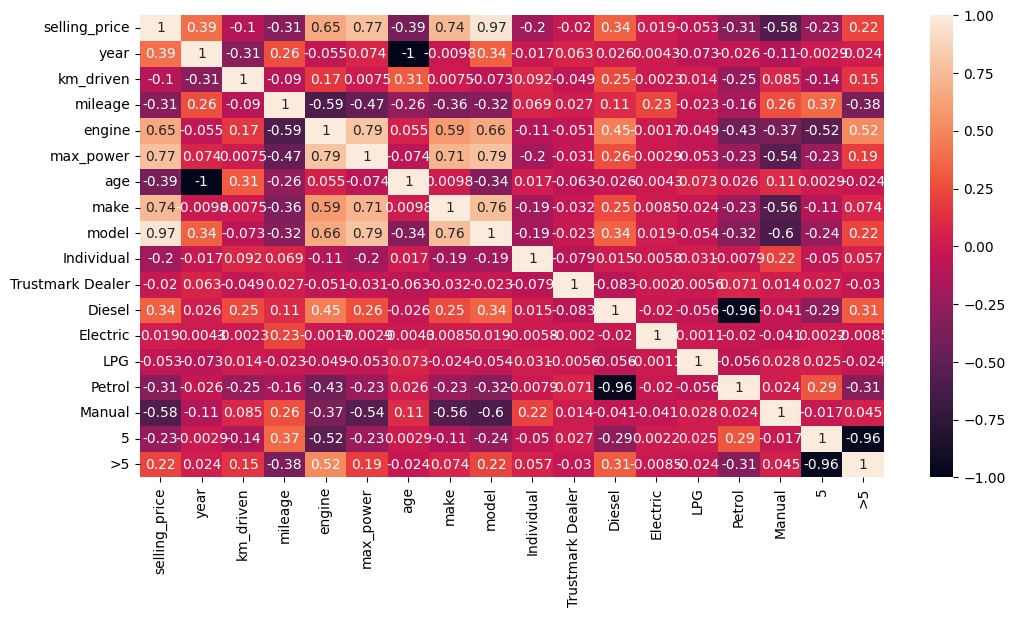

In [6]:
plt.figure(figsize=((12,6)))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
X = df["max_power"].values
Y = df["selling_price"].values

In [8]:
X.shape, Y.shape

((19820,), (19820,))

##Helper Functions

In [9]:
def predict(x, w):
  # this calculation is for one sample
  # y_hat = w1.x + wo - hypothesis
  y_hat = w[1]*x + w[0]
  return y_hat

In [10]:
def error(X, Y, w):
  # for every sample, calculate the squared error and later take the average
  m = X.shape[0]
  total_error = 0.0
  for i in range(m):
    y_hat = predict(X[i], w)
    total_error += (Y[i] - y_hat)**2
  return total_error/m

In [11]:
# dL/dW - we will use all the samples for gradient calculation
def gradient(X, Y, w):
  m = X.shape[0]
  grad = np.zeros((2,))
  for i in range(m):
    y_hat = predict(X[i], w)
    grad[1] += -2*(Y[i] - y_hat) * X[i]
    grad[0] += -2*(Y[i] - y_hat)
  return grad/m

##Trainig process of LR - Gradient Descent

In [12]:
def gradient_descent(X, Y, epochs=100, learning_rate=0.1):
    w = np.zeros((2,))
    w_list,e_list   = [], [] # this is just to log the intermediate e's and w's
    # run the loop 100 times
    for i in range(epochs):
      # calculate the gradient
      grad = gradient(X, Y, w)
      # keep updating the weights
      w[0] = w[0] - learning_rate * grad[0]
      w[1] = w[1] - learning_rate * grad[1]
      # store how weight was getting update in every iteration
      w_list.append([w[0], w[1]])
      # store how error/L is changing in every iteration
      e_list.append(error(X, Y, w))
    return w, w_list, e_list

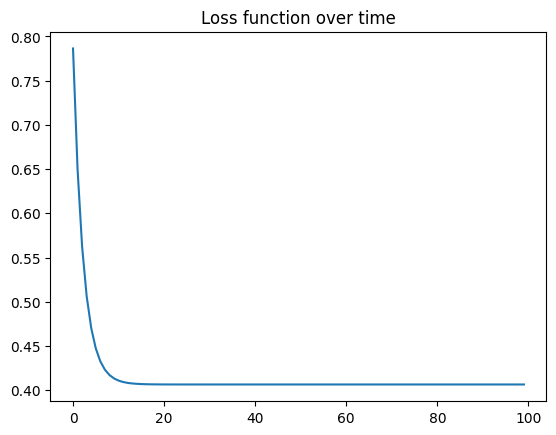

In [14]:
w, w_list, e_list = gradient_descent(X, Y, epochs=100, learning_rate=0.1)
plt.plot(e_list)
plt.title("Loss function over time")
plt.show()


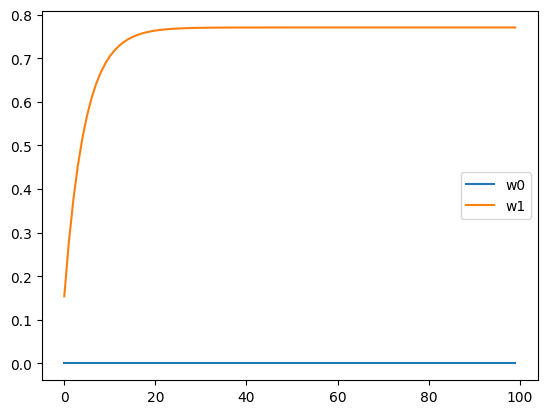

In [15]:
w_list = np.array(w_list)
plt.plot(w_list[:,0], label="w0")
plt.plot(w_list[:,1], label="w1")
plt.legend()
plt.show()

In [16]:
print(w[0], w[1])

-1.5534495990272255e-16 0.7703898544178622


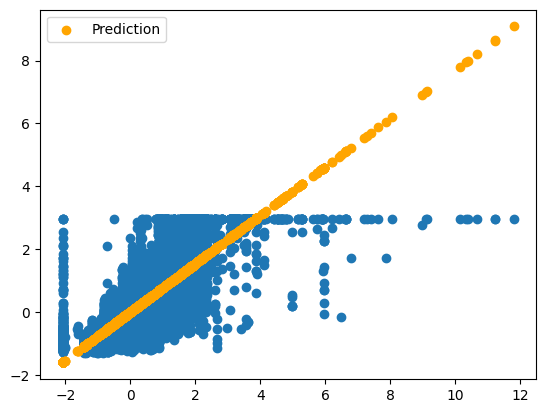

In [17]:
Y_hat = predict(X, w)
plt.scatter(X, Y)
plt.scatter(X, Y_hat, color="orange", label="Prediction")
plt.legend()
plt.show()